# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
#Test block to check for syntax to use in later section
query_url = f"{url}appid={weather_api_key}&units=Imperial&q="
response = requests.get(query_url + cities[0]).json()
response['main']['temp_max']

70.6

In [40]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=Imperial&q="

response_dict = {}
count = 1 # counter to not exceed maximum calls per min
error_counter = 0 # error counter to find out how many rows failed
set_counter = 1 # counter of each minute interval of calls
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {set_counter} | {city}' )
        response = requests.get(query_url + city).json()
        temp = response['main']['temp']
        i_d = response['id']
        name1 = response['name']
        humid = response['main']['humidity']
        cloudy = response['clouds']['all']
        wind = response['wind']['speed']
        lat1 = response['coord']['lat']
        max_temp = response['main']['temp_max']
        lon1 = response['coord']['lon']
        response_dict[city] = {'Name' : name1,
                               'ID' : i_d,
                               'Temp' : temp,
                               'Max Temp' : max_temp,
                               'Humid' : humid,
                               'Cloudy' : cloudy,
                               'Wind' : wind,
                               'Lat' : lat1,
                               'Lon' : lon1,                               
                              }
    except Exception as E:
        print(f'{E} Skipping entry...')
        error_counter= error_counter+1
    count = count+1
    if count == 56:
        t1=time.time() #get the time when you hit 56 calls
        count = 1 
        set_counter = set_counter+1
        time.sleep(60-(t1-t0)) #tell the program to wait until the next minute to start calling agian
        t0=time.time() #reset minute time for next 56 calls
        
print("end of stats loop")
print(f'Could not get data for {error_counter} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | menongue
Processing Record 2 of Set 1 | sioux lookout
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | heidelberg
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | adrar
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | zwedru
Processing Record 12 of Set 1 | halifax
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | goderich
Processing Record 15 of Set 1 | nizhneyansk
'main' Skipping entry...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | muli
Processing Record 18 of Set 1 | skalistyy
'main' Skipping entry...
Processing Record 19 of Set 1 | hermosillo
Processing Record 20 of Set 1 | attawapiskat
'main' Skipping entry...
Processing Record 21 of Set 1 | mayumba
Processin

Processing Record 16 of Set 4 | chadiza
Processing Record 17 of Set 4 | mount isa
Processing Record 18 of Set 4 | cooma
Processing Record 19 of Set 4 | amderma
'main' Skipping entry...
Processing Record 20 of Set 4 | taunggyi
Processing Record 21 of Set 4 | platteville
Processing Record 22 of Set 4 | zhigansk
Processing Record 23 of Set 4 | malwan
'main' Skipping entry...
Processing Record 24 of Set 4 | airai
Processing Record 25 of Set 4 | laguna
Processing Record 26 of Set 4 | kansk
Processing Record 27 of Set 4 | portland
Processing Record 28 of Set 4 | tautira
Processing Record 29 of Set 4 | mahebourg
Processing Record 30 of Set 4 | salalah
Processing Record 31 of Set 4 | dibaya
'main' Skipping entry...
Processing Record 32 of Set 4 | matara
Processing Record 33 of Set 4 | kaitangata
Processing Record 34 of Set 4 | lushunkou
'main' Skipping entry...
Processing Record 35 of Set 4 | yeniseysk
Processing Record 36 of Set 4 | port-gentil
Processing Record 37 of Set 4 | jacareacanga
Pro

Processing Record 39 of Set 7 | los llanos de aridane
Processing Record 40 of Set 7 | waingapu
Processing Record 41 of Set 7 | ciras
'main' Skipping entry...
Processing Record 42 of Set 7 | castro
Processing Record 43 of Set 7 | nuuk
Processing Record 44 of Set 7 | chokurdakh
Processing Record 45 of Set 7 | locri
Processing Record 46 of Set 7 | emerald
Processing Record 47 of Set 7 | kanigoro
Processing Record 48 of Set 7 | eskil
Processing Record 49 of Set 7 | montepulciano
Processing Record 50 of Set 7 | lima
Processing Record 51 of Set 7 | sandwick
Processing Record 52 of Set 7 | ferkessedougou
Processing Record 53 of Set 7 | sindor
Processing Record 54 of Set 7 | dandong
Processing Record 55 of Set 7 | karasburg
Processing Record 1 of Set 8 | muisne
Processing Record 2 of Set 8 | anadyr
Processing Record 3 of Set 8 | unye
'main' Skipping entry...
Processing Record 4 of Set 8 | russell
Processing Record 5 of Set 8 | saint george
Processing Record 6 of Set 8 | kvareli
Processing Reco

Processing Record 9 of Set 11 | nalut
Processing Record 10 of Set 11 | trinidad
Processing Record 11 of Set 11 | aswan
Processing Record 12 of Set 11 | olafsvik
'main' Skipping entry...
Processing Record 13 of Set 11 | amahai
Processing Record 14 of Set 11 | waipawa
Processing Record 15 of Set 11 | svetlogorsk
Processing Record 16 of Set 11 | bonthe
Processing Record 17 of Set 11 | visby
Processing Record 18 of Set 11 | lihula
Processing Record 19 of Set 11 | galveston
Processing Record 20 of Set 11 | san policarpo
Processing Record 21 of Set 11 | labuhan
Processing Record 22 of Set 11 | humaita
Processing Record 23 of Set 11 | ekhabi
Processing Record 24 of Set 11 | avera
Processing Record 25 of Set 11 | forbes
Processing Record 26 of Set 11 | dhidhdhoo
Processing Record 27 of Set 11 | vila velha
Processing Record 28 of Set 11 | bichura
Processing Record 29 of Set 11 | saquarema
Processing Record 30 of Set 11 | el limon
Processing Record 31 of Set 11 | lesnica
Processing Record 32 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
cities_df = [response_dict[x] for x in response_dict]
cities_df = pd.DataFrame(cities_df)
cities_df.to_csv('weatherpy.csv')
cities_df.head()

,Cloudy,Humid,ID,Lat,Lon,Max Temp,Name,Temp,Wind
0,78,32,3347353,-14.66,17.68,70.60,Menongue,70.60,6.69
1,40,72,6148373,50.10,-91.92,62.60,Sioux Lookout,61.09,3.36
2,100,73,4035715,-21.21,-159.78,71.60,Avarua,71.60,8.05
3,90,83,5848280,22.08,-159.32,84.20,Kapaa,81.64,13.87
4,0,100,2907911,49.41,8.69,57.99,Heidelberg,53.47,2.24


In [42]:
# Call in data from CSV to dataframe so that I don't have
# to re-run the API calls if I come back to this another day
cities_df2 = pd.read_csv('weatherpy.csv')
cities_df2 =cities_df2.drop(columns = ['Unnamed: 0'])
cities_df2.head()

,Cloudy,Humid,ID,Lat,Lon,Max Temp,Name,Temp,Wind
0,78,32,3347353,-14.66,17.68,70.60,Menongue,70.60,6.69
1,40,72,6148373,50.10,-91.92,62.60,Sioux Lookout,61.09,3.36
2,100,73,4035715,-21.21,-159.78,71.60,Avarua,71.60,8.05
3,90,83,5848280,22.08,-159.32,84.20,Kapaa,81.64,13.87
4,0,100,2907911,49.41,8.69,57.99,Heidelberg,53.47,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

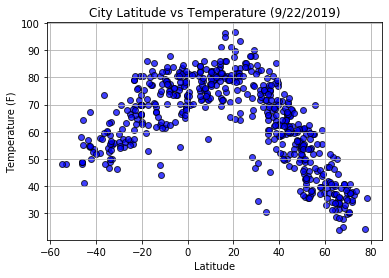

In [43]:
plt.scatter(cities_df2['Lat'], cities_df2['Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Temperature (9/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(b=True, which='major', axis='both')
plt.savefig("weather graph exports/Lat_V_Temp.png")

This clearly shows that temperature increases at the equator and trails off as it reaches either pole. It seems to be centered slightly past 0, somewhere between 0 and 20, which is due to summer in the northern hemisphere. If it was winter it would be skewed closer to -20.

#### Latitude vs. Humidity Plot

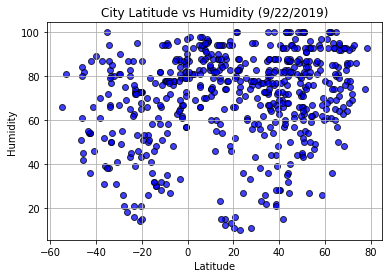

In [44]:
plt.scatter(cities_df2['Lat'], cities_df2['Humid'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity (9/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which='major', axis='both')
plt.savefig("weather graph exports/Lat_V_Humid.png")
#That outlier is Paita, PE: https://openweathermap.org/city/3694112, not sure why it shows 290% humidity,
#other than as a lesson that even API data can be flawed and require cleaning

There doesn't seem to be that strong of a realtionship between latitude and humidity. It looks that at the equator the humidity is always a little higher, but that's about it.

#### Latitude vs. Cloudiness Plot

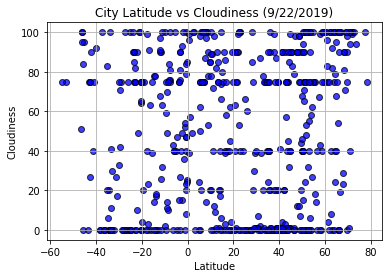

In [45]:
plt.scatter(cities_df2['Lat'], cities_df2['Cloudy'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness (9/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which='major', axis='both')
plt.savefig("weather graph exports/Lat_V_Cloudy.png")

There does not appear to be virtually any realtionship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

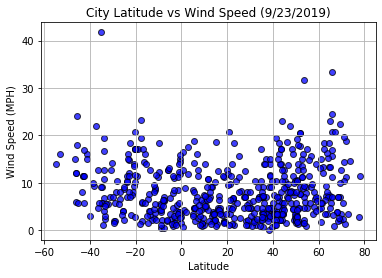

In [46]:
plt.scatter(cities_df2['Lat'], cities_df2['Wind'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed (9/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(b=True, which='major', axis='both')
plt.savefig("weather graph exports/Lat_V_Wind.png")

There appears to be a slight increase in windspeed nearer the pols, but this is slight. Other than that it seems to be pretty evenly distributed.

## Linear Regression

In [94]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regresser(x,y,x_label,y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,alpha = 0.5)
    plt.plot(x,regress_values,"r-")
    min_x = min(x)
    min_y = min(y)
    plt.annotate(line_eq,(min_x,min_y),fontsize=12,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"weather graph exports/{y_label}_V_{x_label}.png")
    plt.show()

In [95]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df2.loc[cities_df2['Lat'] > 0]
south_df = cities_df2.loc[cities_df2['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

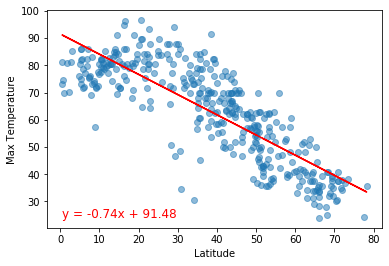

In [96]:
lin_regresser(north_df['Lat'],north_df['Max Temp'],'Latitude','Max Temperature')

Here is, again, strong evidence that maximum temperature is much higher at the equator and drops towards the poles.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

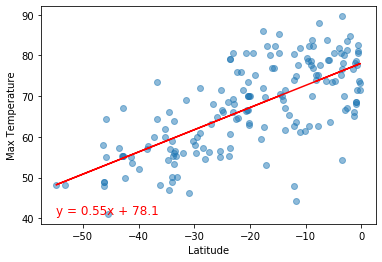

In [97]:
lin_regresser(south_df['Lat'],south_df['Max Temp'],'Latitude','Max Temperature')

Very similiar to the graph above but a little more spread. I know there is less total landmass in the southern hemisphere and it's relatively more mountainous, so it might be caused by topograpical differences.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

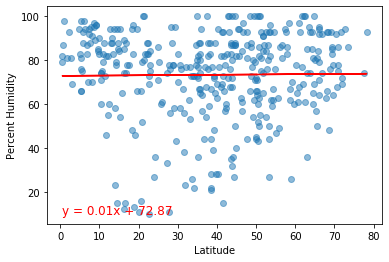

In [98]:
lin_regresser(north_df['Lat'],north_df['Humid'],'Latitude','Percent Humidity')

Pretty spread out, doesn't seem to be much of a relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

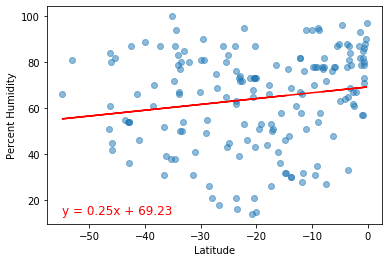

In [99]:
lin_regresser(south_df['Lat'],south_df['Humid'],'Latitude','Percent Humidity')

Surprisingly this seems to show a slightly stronger relationship than the northern hemisphere, but still relatively spread out.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

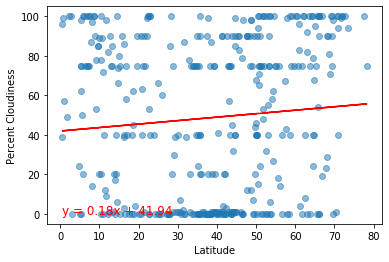

In [100]:
lin_regresser(north_df['Lat'],north_df['Cloudy'],'Latitude','Percent Cloudiness')

Virtually no relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

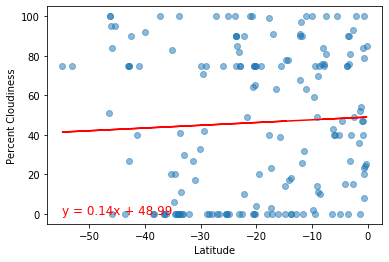

In [101]:
lin_regresser(south_df['Lat'],south_df['Cloudy'],'Latitude','Percent Cloudiness')

Again, latitude is a weak explanitory variable for cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

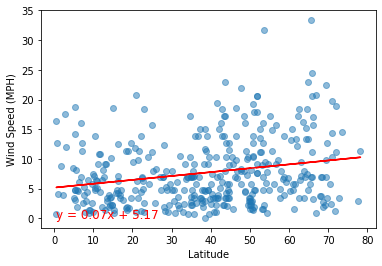

In [102]:
lin_regresser(north_df['Lat'],north_df['Wind'],'Latitude','Wind Speed (MPH)')

It seems that windspeed gets closer to the poles, probably as a result of pressure changes based on the temperature.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

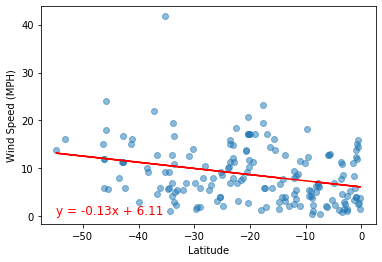

In [103]:
lin_regresser(south_df['Lat'],south_df['Wind'],'Latitude','Wind Speed (MPH)')

It seems that windspeed gets closer to the poles, probably as a result of pressure changes based on the temperature.

# Observable Trends

### Temperature is higher closer to the equator.
### Wind speed is higher at the poles.
### Cloud cover and humidity have no observable relationship to latitude.